# Proyecto
## TEL-354: Minería de Datos 2022-1 
### Prof. Mauricio Araya

## Shootings USA

Tenemos 2000 datos desde el 2016 al 2021 lo que nos da una proporcion de 1.3 tiroteos diarios

este dataset nos puede serivir como contexto hasta el 2017, de como evoluciono los tiroteos del 66 al 2017

al parecer es el data actualizado del dataset anterior 

misma que ver 3 pero con mas columnas de datos, habria que limpiar el dataset para ver si son empleados, a primera vista no nos dara info importante ademas no todos son trabajadores, habria que generar disstintas columnas para analizarlas por tipos

In [210]:
import pandas as pd
df_shooting5=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
deep_copy = df_shooting5.copy()
deep_copy.pop('Latitude')
deep_copy.pop('Longitude')
deep_copy.pop('Summary')
deep_copy.pop('Employed at')

deep_copy.pop('Open/Close Location')
deep_copy.pop('Title')
deep_copy.pop('Location')
deep_copy.pop('Incident Area')
deep_copy.pop('Policeman Killed')
deep_copy.pop('Date')
deep_copy.pop('Race')
#deep_copy.pop('Age')
deep_copy.pop('Target')
#deep_copy.pop('S#')
deep_copy = deep_copy.dropna(axis=0)
deep_copy["Age"] = deep_copy["Age"].astype(str).astype(int) 
deep_copy

,S#,Cause,Fatalities,Injured,Total victims,Age,Employeed (Y/N),Mental Health Issues,Gender
5,6,terrorism,3,0,3,24,1.0,Unclear,M
6,7,unemployement,5,0,5,45,1.0,Unclear,M
155,156,terrorism,1,6,6,19,1.0,No,Male
156,157,psycho,3,12,15,34,1.0,Unclear,M
157,158,psycho,4,16,19,34,1.0,Yes,Male
161,162,anger,1,3,4,23,0.0,No,Male
163,164,terrorism,13,3,15,34,1.0,Yes,Male
165,166,psycho,4,4,8,44,0.0,Unknown,Male
166,167,psycho,3,3,6,59,0.0,No,Male
171,172,psycho,5,2,6,64,0.0,No,Male


esta es la version final de los datases, le agregan mas datos y acutalizan los datos

Tuvimos que buscar una nueva data por registrar xq eliminaron las csv

##### nuestro objetivo es descubrir si las causantes de los tirotes de usa, es la salud mental, obteniendo esta info a traves de los dataset de kaggle con datos realcionados con la salud mental con datos como si tenia problemas, la causa del tiroteo

Actualizacion: usaremos el ver5 para el contexto y con el de la actualidad 2000 filas

## buscar el dataset de la salud mental en usa y empezar el analisis

In [102]:
deep_copy.columns.values

array(['S#', 'Cause', 'Fatalities', 'Injured', 'Total victims',
       'Employeed (Y/N)', 'Mental Health Issues', 'Gender'], dtype=object)

In [59]:
df_shooting5.groupby(['Mental Health Issues']).mean()

,S#,Fatalities,Injured,Total victims,Employeed (Y/N)
Mental Health Issues,,,,,
No,195.956989,3.903226,3.408602,6.967742,0.592593
Unclear,67.076923,12.769231,50.000000,62.692308,1.000000
Unknown,94.027273,2.536364,3.281818,5.472727,0.833333
Yes,214.905660,5.811321,6.283019,11.698113,0.535714
unknown,107.000000,9.000000,1.000000,10.000000,NaN


In [201]:
#los que tienen problemas de salud mental
df_shooting5_mentalYes=deep_copy[deep_copy['Mental Health Issues']=='Yes']
df_shooting5_mentalNo=deep_copy[deep_copy['Mental Health Issues']=='No']
df_shooting5_mentalUnknown=deep_copy[deep_copy['Mental Health Issues']=='Unknown']
df_shooting5_mentalUnclear=deep_copy[deep_copy['Mental Health Issues']=='Unclear']
#shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo])
shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo,df_shooting5_mentalUnknown,df_shooting5_mentalUnclear])
#shootings
#df_shooting5_mentalYes.groupby(['Target']).mean()

In [99]:
#Matriz correlación
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr_matrix(data,features=None,annot=True,s=(25,25)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 60)
    plt.show()

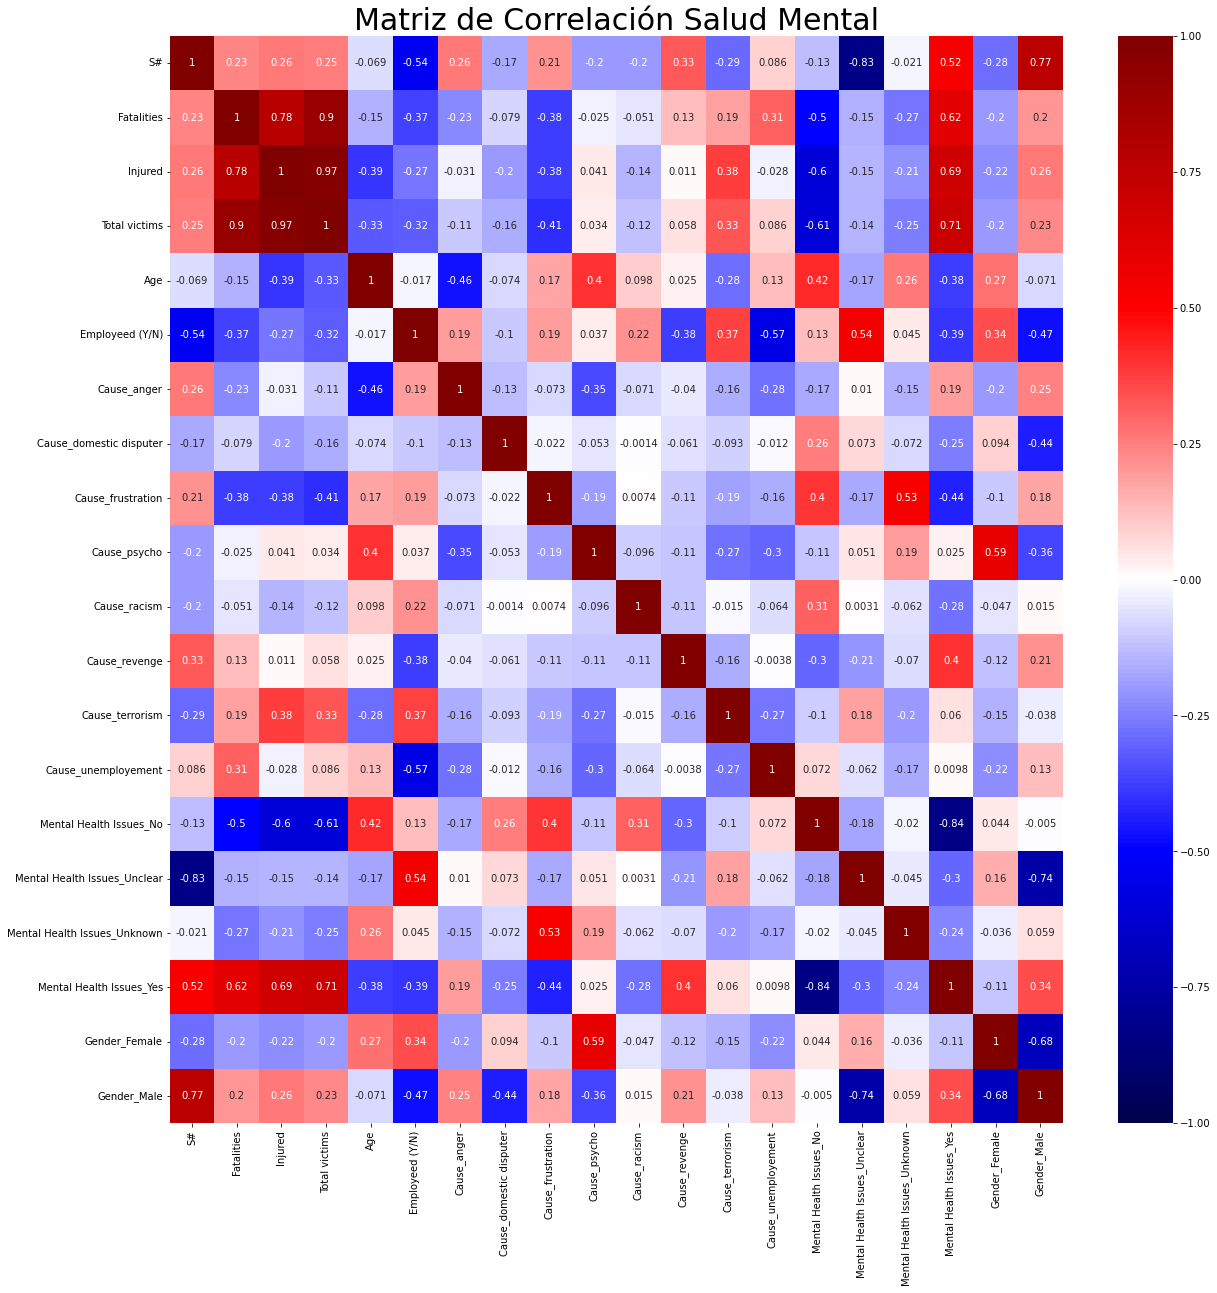

In [219]:
binarios_data_1=pd.get_dummies(shootings)
binarios_data_1.pop('Gender_M')
#binarios_data_1.pop('Gender_M/F')
binarios_data_1.pop('Gender_Male/Female')
#binarios_data_1.pop('Gender_Unknown')

correlacion=binarios_data_1.corr(method='pearson')
plot_corr_matrix(correlacion)
#binarios_data_1

In [154]:
binarios_data_1

,S#,Fatalities,Injured,Total victims,Employeed (Y/N),Cause_anger,Cause_breakup,Cause_domestic dispute,Cause_domestic disputer,Cause_drunk,...,Cause_racism,Cause_religious radicalism,Cause_revenge,Cause_robbery,Cause_suspension,Cause_terrorism,Cause_unemployement,Cause_unknown,Gender_Female,Gender_Male
4,5,3,2,5,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,3,0,3,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,5,6,11,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,11,5,0,5,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,12,3,3,6,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,14,21,35,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
82,83,3,9,12,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,157,3,12,15,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,168,7,0,7,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame()
df['Mental Health Issues'] = df_shooting5['Mental Health Issues']
df['S#'] = df_shooting5['S#']
deep_copy_2 = deep_copy.copy()
#shootings.pop('Mental Health Issues')
binarios_data_2=pd.get_dummies(deep_copy_2)
#binarios_data_2.pop('Mental Health Issues_unknown')
binarios_data_2.pop('Mental Health Issues_Yes')
binarios_data_2.pop('Mental Health Issues_Unknown')
binarios_data_2.pop('Mental Health Issues_Unclear')
binarios_data_2.pop('Mental Health Issues_No')
binarios_data_2.pop('Gender_M')
#binarios_data_2.pop('Gender_M/F')
binarios_data_2.pop('Gender_Male/Female')
#binarios_data_2.pop('Gender_Unknown')
binarios_data_2.pop('Fatalities')
binarios_data_2.pop('Injured')
binarios_data_2.pop('Employeed (Y/N)')
#binarios_data_2.pop('Cause_breakup')
#binarios_data_2.pop('Cause_drunk')
#binarios_data_2.pop('Cause_religious radicalism')
binarios_data_2.pop('Cause_revenge')
#binarios_data_2.pop('Cause_suspension')
merged_left = pd.merge(left=binarios_data_2,right=df, how='left', left_on='S#', right_on='S#')
#merged_left.pop('S#')
merged_left

,S#,Total victims,Age,Cause_anger,Cause_domestic disputer,Cause_frustration,Cause_psycho,Cause_racism,Cause_terrorism,Cause_unemployement,Gender_Female,Gender_Male,Mental Health Issues
0,6,3,24,0,0,0,0,0,1,0,0,0,Unclear
1,7,5,45,0,0,0,0,0,0,1,0,0,Unclear
2,156,6,19,0,0,0,0,0,1,0,0,1,No
3,157,15,34,0,0,0,1,0,0,0,0,0,Unclear
4,158,19,34,0,0,0,1,0,0,0,0,1,Yes
5,162,4,23,1,0,0,0,0,0,0,0,1,No
6,164,15,34,0,0,0,0,0,1,0,0,1,Yes
7,166,8,44,0,0,0,1,0,0,0,0,1,Unknown
8,167,6,59,0,0,0,1,0,0,0,0,1,No
9,172,6,64,0,0,0,1,0,0,0,0,1,No


In [184]:

deep_copy_3 = df_shooting5.copy()
deep_copy_3.pop('Latitude')
deep_copy_3.pop('Longitude')
deep_copy_3.pop('Summary')
deep_copy_3.pop('Employed at')

deep_copy_3.pop('Open/Close Location')
deep_copy_3.pop('Title')
deep_copy_3.pop('Location')
deep_copy_3.pop('Incident Area')
deep_copy_3.pop('Policeman Killed')
deep_copy_3.pop('Date')
deep_copy_3.pop('Race')
#deep_copy_3.pop('Age')
deep_copy_3.pop('Target')
deep_copy_3 = deep_copy_3.dropna(axis=0)
deep_copy_3["Age"] = deep_copy_3["Age"].astype(str).astype(int) 

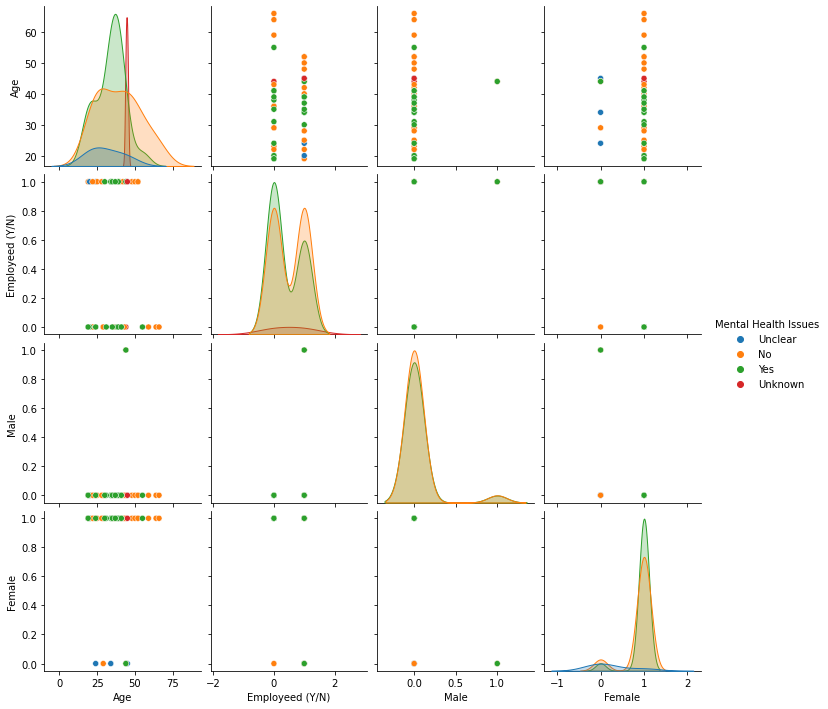

In [216]:
deep_copy_4 = deep_copy.copy()
df_2 = pd.DataFrame()
df_2['Male'] = merged_left['Gender_Female']
df_2['Female'] = merged_left['Gender_Male']
df_2['S#'] = merged_left['S#']
feat_selected = [ 'Age','Employeed (Y/N)','Male','Female']
merged_left_2 = pd.merge(left=deep_copy_4,right=df_2, how='left', left_on='S#', right_on='S#')
merged_left_2.pop('S#')
#Mental Health Issues
sns.pairplot(merged_left_2, vars=feat_selected,hue="Mental Health Issues")
#merged_left


In [222]:
merged_left_2.head()

,Cause,Fatalities,Injured,Total victims,Age,Employeed (Y/N),Mental Health Issues,Gender,Male,Female
0,terrorism,3,0,3,24,1.0,Unclear,M,0,0
1,unemployement,5,0,5,45,1.0,Unclear,M,0,0
2,terrorism,1,6,6,19,1.0,No,Male,0,1
3,psycho,3,12,15,34,1.0,Unclear,M,0,0
4,psycho,4,16,19,34,1.0,Yes,Male,0,1


<AxesSubplot:xlabel='Age', ylabel='Female'>

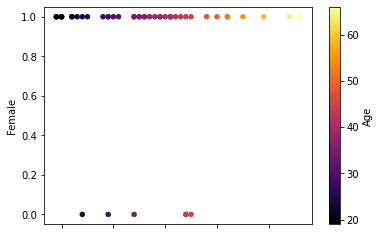

In [225]:
merged_left_2.plot.scatter('Age','Female',c='Age',cmap='inferno') 

<AxesSubplot:xlabel='Age', ylabel='Male'>

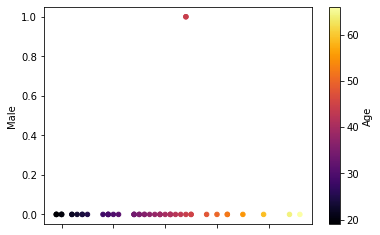

In [226]:
merged_left_2.plot.scatter('Age','Male',c='Age',cmap='inferno') 